In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-11-08 09:01:07.239539: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 09:01:07.239594: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 09:01:07.239612: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 09:01:07.246860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df=pd.read_excel("preprocessed.xlsx")

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['HaveWorkedWith'], axis=1, inplace=True)
print(df.columns)

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'MentalHealth',
       'MainBranch', 'YearsCode', 'YearsCodePro', 'PreviousSalary',
       'ComputerSkills', 'Employed'],
      dtype='object')


In [4]:
def split(df, train_split=0.8, val_split=0.1, test_split=0.1):
    df_sample = df.sample(frac=1, random_state=12)
    indices_or_sections = [int(train_split * len(df)), int((1 - val_split - test_split) * len(df))]
    train, val, test = np.split(df_sample, indices_or_sections)
    return train, val, test
train, val, test=split(df, 0.9,0,0.1)
train_x=train.drop(['Employed'], axis=1)
train_y=train['Employed']

In [5]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2, activation='linear')
])

2023-11-08 09:01:19.190028: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-08 09:01:19.218735: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-08 09:01:19.218781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-08 09:01:19.220868: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-08 09:01:19.220916: I tensorflow/compile

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )
history=model.fit(train_x, train_y,
                  validation_split = 0.1, 
                  epochs=50,
                  verbose=2
                 )

Epoch 1/50


2023-11-08 09:01:20.372341: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f25bc00df20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-08 09:01:20.372386: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-08 09:01:20.376177: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-08 09:01:20.388467: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-08 09:01:20.457479: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1860/1860 - 10s - loss: 170.7492 - accuracy: 0.5227 - val_loss: 35.6095 - val_accuracy: 0.5384 - 10s/epoch - 5ms/step
Epoch 2/50
1860/1860 - 9s - loss: 29.2629 - accuracy: 0.5476 - val_loss: 20.8077 - val_accuracy: 0.5413 - 9s/epoch - 5ms/step
Epoch 3/50
1860/1860 - 9s - loss: 22.8568 - accuracy: 0.5680 - val_loss: 1.6581 - val_accuracy: 0.7293 - 9s/epoch - 5ms/step
Epoch 4/50
1860/1860 - 9s - loss: 19.8970 - accuracy: 0.5856 - val_loss: 30.0193 - val_accuracy: 0.5440 - 9s/epoch - 5ms/step
Epoch 5/50
1860/1860 - 9s - loss: 20.3079 - accuracy: 0.5986 - val_loss: 13.7459 - val_accuracy: 0.5679 - 9s/epoch - 5ms/step
Epoch 6/50
1860/1860 - 9s - loss: 22.5005 - accuracy: 0.5902 - val_loss: 7.6673 - val_accuracy: 0.6293 - 9s/epoch - 5ms/step
Epoch 7/50
1860/1860 - 9s - loss: 19.5561 - accuracy: 0.6061 - val_loss: 15.1824 - val_accuracy: 0.5839 - 9s/epoch - 5ms/step
Epoch 8/50
1860/1860 - 9s - loss: 17.9537 - accuracy: 0.6196 - val_loss: 28.4791 - val_accuracy: 0.5569 - 9s/epoch - 5ms/step
Ep

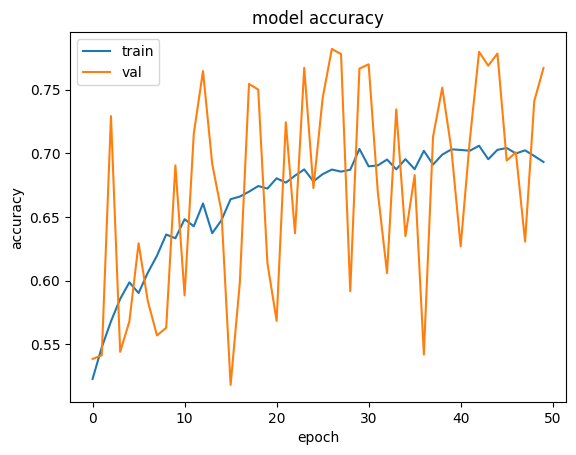

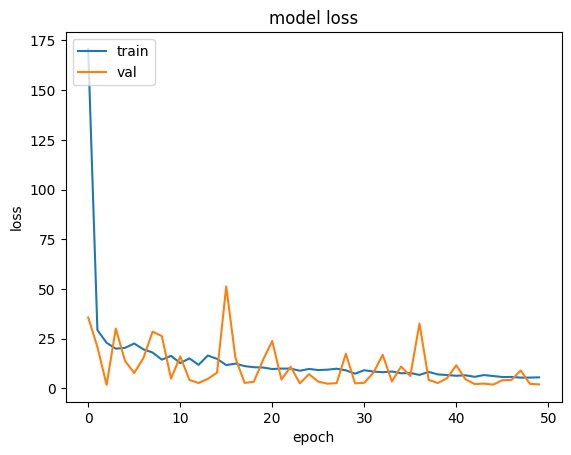

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                132       
                                                                 
 dense_10 (Dense)            (None, 10)                130       
                                                                 
 dense_11 (Dense)            (None, 2)                 22        
                                                                 
Total params: 284 (1.11 KB)
Trainable params: 284 (1.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
